In [198]:
import skimage as sk
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import copy
import tifffile

In [76]:
def normalize_image(im, mult_factor = 1):
    '''
    Normalize image (any Dimensions) function.
    '''
    im = np.array(im)
    norm_im = (im - im.min()) / (im.max()-im.min()) * mult_factor
    return norm_im

def reverse_values(im):
    rev_im = im.max()-im
    return rev_im

In [194]:
tp_list = [str(2), str(3)]
max_intensity_indices_list = []
for tp in tp_list:
    surface_cells_mask_filter = sk.io.imread('./../../ppujol/dome70/70_denoised-tp'+tp+'-no_adjusted-cells_mask_filter.tif')
    max_intensity_indices = np.argmax(surface_cells_mask_filter, axis=0)
    max_intensity_indices[:4, :] = max_intensity_indices[5, :]
    max_intensity_indices[-4:, :] = max_intensity_indices[-5, :]
    max_intensity_indices_list.append(max_intensity_indices)
    # max_intensity_values = np.max(surface_cells_mask_filter, axis=0)


In [226]:
max_intensity_indices_fixed = []

for max_intensity_indices in max_intensity_indices_list:

    dots = copy.copy(max_intensity_indices[50:750, 50:750])

    dots = reverse_values(dots)
    # fix dots min
    print(f'- minimum value before = {dots.min()}')
    dots[dots < 100] = 105
    print(f'minimum value after = {dots.min()}')

    # fix dots max
    print(f'- maximum value before = {dots.max()}')
    dots[dots > 500] = 100
    print(f'maximum value before = {dots.max()}')

    max_intensity_indices_fixed.append(dots)


- minimum value before = 0
minimum value after = 100
- maximum value before = 444
maximum value before = 444
- minimum value before = 0
minimum value after = 100
- maximum value before = 549
maximum value before = 293


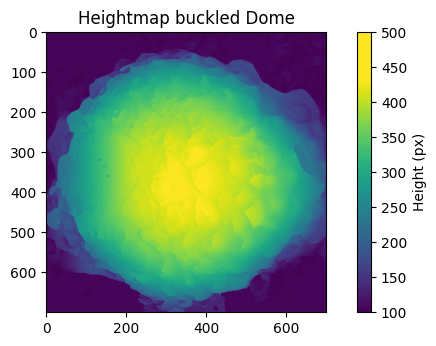

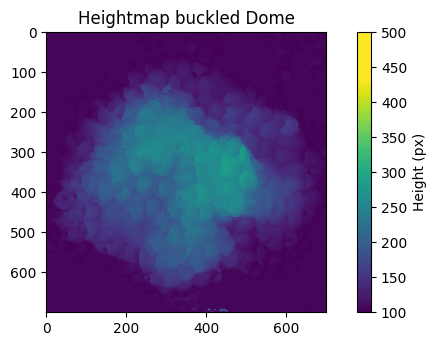

: 

In [227]:
viridis_half = plt.cm.viridis(np.linspace(-0, 1.2, 256))

for i, tp in enumerate(tp_list):
    plt.figure(figsize=(8,8))
    plt.subplot(211)
    plt.title('Heightmap buckled Dome')
    plt.imshow(max_intensity_indices_fixed[i], cmap=LinearSegmentedColormap.from_list("viridis_half", viridis_half))
    cbar = plt.colorbar()
    cbar.set_label('Height (px)')
    plt.clim(100, 500)
    plt.savefig('./../../ppujol/dome70/70_denoised-tp'+tp+'-heightmap.svg')
    tifffile.imwrite('./../../ppujol/dome70/70_denoised-tp'+tp+'-heightmap.tif', normalize_image(max_intensity_indices_fixed[i], max_intensity_indices_fixed[i].max()).astype(np.uint16))